# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.


## Instructions

- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q2.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Ayush Agrawal <br>
Roll Number: 2020101025

In [1]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [2]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [3]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [5]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


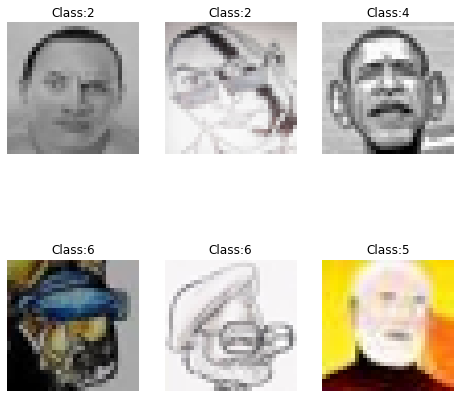

In [6]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

In [7]:
imgs = []
for img in X:
    imgs.append(np.reshape(img, (H*W*C)))
imgs = np.array(imgs)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [8]:
# write function
def get_eigenval_eigenvec(X):
    imgs = []
    for img in X:
        imgs.append(np.reshape(img, (H*W*C)))
    imgs = np.array(imgs)
    imgs = imgs - np.mean(imgs, axis=0)
    cov_mat = (1/imgs.shape[0]) * np.matmul(imgs, imgs.T)
    eigen_val, eigen_vec = np.linalg.eigh(cov_mat)
    # print(eigen_val)
    eigen_vec = np.matmul(imgs.T, eigen_vec)
    sorted_index = np.flip(np.argsort(eigen_val))
    eigen_val = eigen_val[sorted_index]
    eigen_vec = eigen_vec[:, sorted_index]
    
    eigen_vec = eigen_vec / np.linalg.norm(eigen_vec, axis=0)

    return eigen_val, eigen_vec



#### Compute eigen values and plot eigen value spectrum

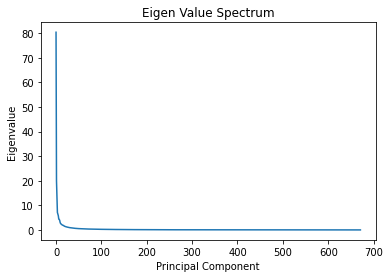

In [9]:
# eigen values and spectrum
eigen_val, eigen_vec = get_eigenval_eigenvec(X)
import matplotlib.pyplot as plt
plt.plot(eigen_val)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigen Value Spectrum')
plt.show()

#### Plot the percentage of variances vs the number of principal components

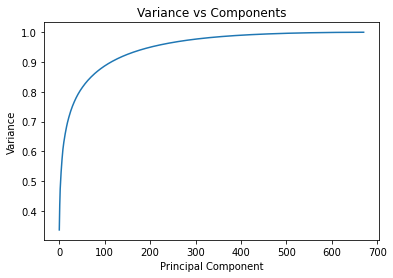

In [10]:
# plot variance vs components
var_arr = []
sum_eigen_val = np.sum(eigen_val)
# print(sum_eigen_val)
for i in range(1, eigen_val.shape[0]):
    var_arr.append(np.sum(eigen_val[:i])/sum_eigen_val)
plt.plot(var_arr)
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('Variance vs Components')
plt.show()

#### Visualize eigen faces(eigen vectors)

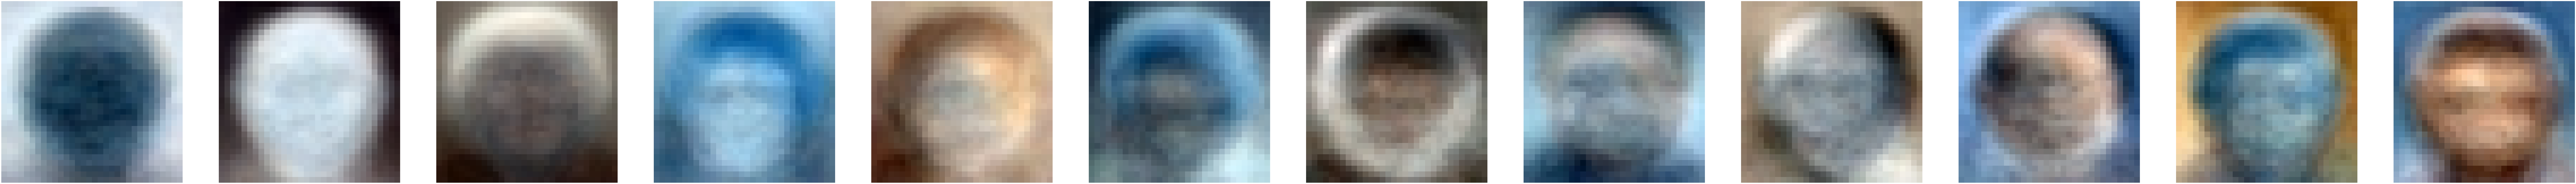

In [11]:

# Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image, H, W, C, indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T, (-1, H, W, C))
    plt.figure(figsize=(250, 250))
    for r in range(0, int(12/12)):
        for c in range(0, 12, 1):
            ele = pl[int(r*12 + c)]
            minim = np.min(ele)
            maxim = np.max(ele)
            ele = (ele - minim) / (maxim - minim)
            ele = np.clip(ele, 0, 254)
            plt.subplot(int(12/12), 12, r*12 + c+1)
            plt.axis('off')
            plt.imshow(ele, cmap=plt.cm.gray)
    plt.show()

indices = np.arange(0, 12, 1)
plot(eigen_vec, H, W, C, indices)


The "ghost faces" represent the variations in the data. The eigen faces are the directions in which the data varies the most. The first eigen face is the direction in which the data varies the most and so on. They help to encode the data in a lower dimensional space while preserving the maximum amount of variance. This lowers the computational cost significantly while retaining the most important information.

#### Reconstruction 

Original Images: 


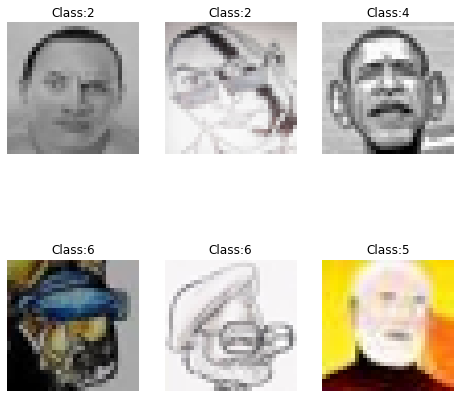

Reconstructed Images using 672 components: 


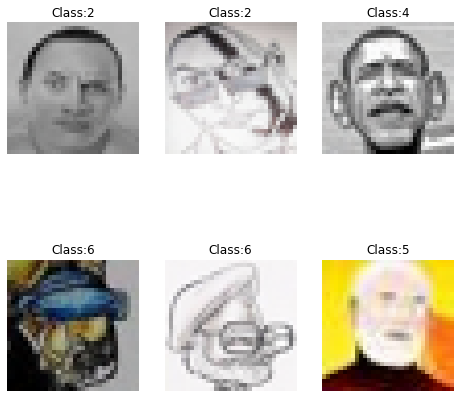

In [12]:
# reconstruction
def reconstruct_image(X, eigen_vec, k):
    topk_eigen_vec = eigen_vec[:, :k]

    # Projecting the images into lower K dimensional space
    project_imgs = np.matmul(X - np.mean(X, axis=0), topk_eigen_vec)

    # Reconstructing the images from the lower K dimensional space
    reconstruct_imgs = np.matmul(project_imgs, topk_eigen_vec.T) + np.mean(X, axis=0)
    reconstruct_imgs = np.array(reconstruct_imgs).reshape(N, H, W, C)
    reconstruct_imgs = np.clip(reconstruct_imgs, 0, 1)

    return reconstruct_imgs

k = 672
# display_images(X[ind,...],y[ind], row=2, col=3)
print("Original Images: ")
display_images(X[ind,...],y[ind], row=2,col=3)
print("Reconstructed Images using {} components: ".format(k))
display_images(reconstruct_image(imgs, eigen_vec, k)[ind,...],y[ind], row=2,col=3)


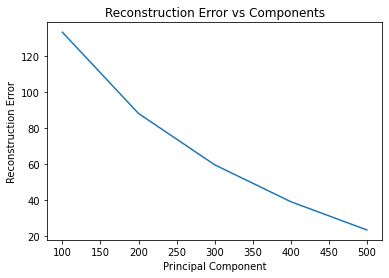

In [13]:
principal_components = [100, 200, 300, 400, 500]
rec_error_arr = []
for k in principal_components:
    rec_imgs = reconstruct_image(imgs, eigen_vec, k)
    rec_imgs_flat = []
    for img in rec_imgs:
        rec_imgs_flat.append(np.reshape(img, (H*W*C)))
    rec_imgs_flat = np.array(rec_imgs_flat)
    rec_error = np.linalg.norm(imgs - rec_imgs_flat, 'fro')
    rec_error_arr.append(rec_error)

plt.plot(principal_components, rec_error_arr)
plt.xlabel('Principal Component')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs Components')
plt.show()

## Plot data in 2D

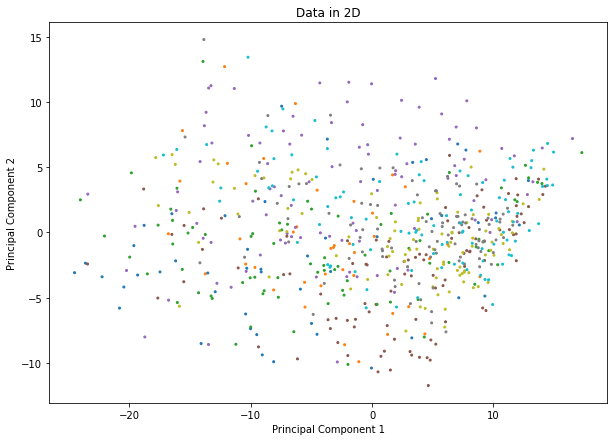

In [14]:
# plot data in 2D
top2_eigenvec = eigen_vec[:, :2]
project_imgs_x = np.matmul(imgs - np.mean(imgs, axis=0), top2_eigenvec[:, 0])
project_imgs_y = np.matmul(imgs - np.mean(imgs, axis=0), top2_eigenvec[:, 1])
plt.figure(figsize=(10, 7))
plt.scatter(project_imgs_x, project_imgs_y, s=4, c=y, cmap='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in 2D')
plt.show()

Observations:
- There are several outlier points which signify the features specific to that class. 
- The data is not clustered which implies the top two eigen vectors capture only a small amount of variance.
- There are many overlapping points which signify features common across classes.

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [15]:
# Load data again
X,y = load_data(dirpath)
names = list(cfw_dict.keys())

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

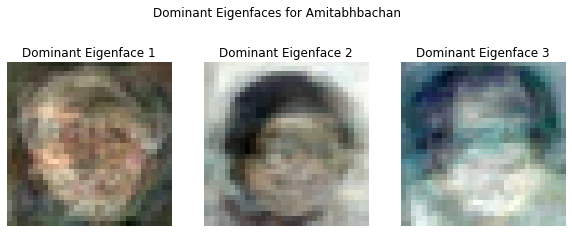

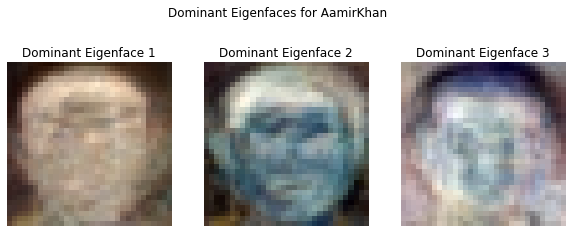

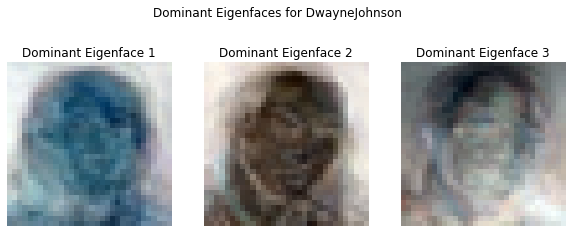

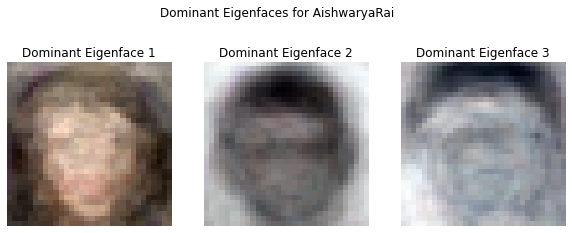

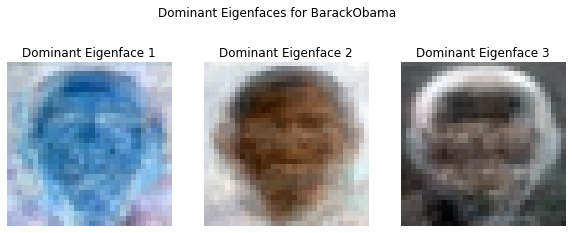

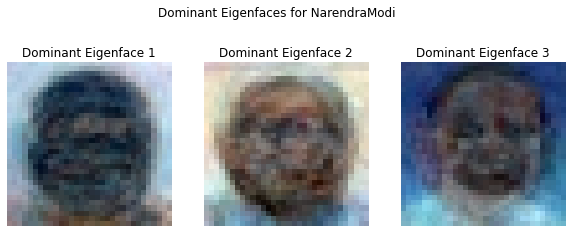

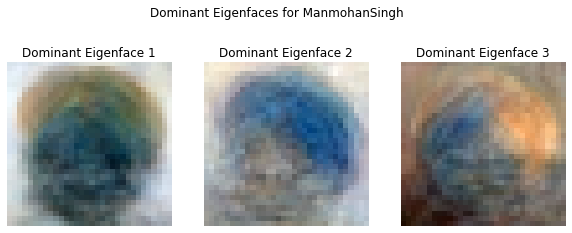

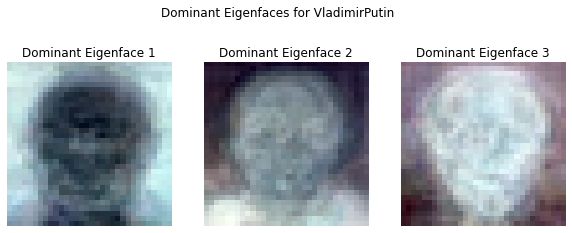

In [16]:
# visualize
def visualise_dominant_eigenfaces(X_i, index):
    eigen_val, eigen_vec = get_eigenval_eigenvec(X_i)
    top3_eigen_vec = eigen_vec[:, :3]
    fig, ax = plt.subplots(figsize=(10, 4))
    for i in range(3):
        eigen_face = np.array(top3_eigen_vec)[:, i].reshape(H, W, C)
        eigen_face = eigen_face - np.min(eigen_face)
        eigen_face = eigen_face / np.max(eigen_face)
        ax = plt.subplot(1, 3, i+1)
        ax.imshow(eigen_face)
        ax.set_title('Dominant Eigenface ' + str(i+1))
        ax.axis('off')
        fig.suptitle('Dominant Eigenfaces for ' + names[index])
    plt.show()

for i in range(8):
    X_i = X[y==i]
    visualise_dominant_eigenfaces(X_i, i)

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [17]:
# components required
def Ncomponents_for_90_variance(X):
    eigen_val, eigen_vec = get_eigenval_eigenvec(X)
    sum_eigen_val = np.sum(eigen_val)
    cursum = 0.0
    for i in range(0, eigen_val.shape[0]):
        cursum += eigen_val[i]
        if cursum/sum_eigen_val >= 0.9:
            return i


print("Entire DataSet: ", Ncomponents_for_90_variance(X))
for i in range(0, 8):
    print("Class: {}, {}".format(names[i], Ncomponents_for_90_variance(X[y==i])))

Entire DataSet:  114
Class: Amitabhbachan, 20
Class: AamirKhan, 23
Class: DwayneJohnson, 27
Class: AishwaryaRai, 35
Class: BarackObama, 42
Class: NarendraModi, 56
Class: ManmohanSingh, 49
Class: VladimirPutin, 43


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

No, the number of components are not same for the entire dataset and each of the classes.
Different face structures of different people require different number of principal components to retain 90% variance. For the entire dataset, it has to capture many features and hence requires more principal components.
This is due to the variance captured by the eigenvectors of different classes which is different for each class. For eg, the top 20 eigenvectors of Class Amitabhbachan can capture the 90% of the variance of the dataset corressponding to that class but in case of BarackObama, we need top 42 eigenvectors to capture 90% variance of the data.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [18]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [19]:
# code here
from sklearn.linear_model import LinearRegression
imgs = []
for img in X:
    imgs.append(np.reshape(img, (H*W*C)))
imgs = np.array(imgs)
# print(imgs.shape)
imgs = imgs - np.mean(imgs, axis=0)
clf = LinearRegression()
clf.fit(imgs, label)
clf.score(imgs, label)

1.0

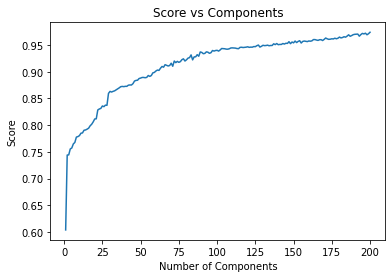

In [20]:
from sklearn.decomposition import PCA

scores = []
for i in range(1, 201):
    pca = PCA(n_components=i)
    pca.fit(imgs)
    X_reduced = pca.transform(imgs)

    clf = LinearRegression()
    clf.fit(X_reduced, label)
    scores.append(clf.score(X_reduced, label))

plt.plot(range(1, 201), scores)
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('Score vs Components')
plt.show()

The $R^2$ score or the linear regression score defines how good our model fits the data. As we increase the number of principal components, we observe that the the score increases which implies that our model fits the data more and more well. When we use all the 672 components in pca, the score becomes 1.0 which means all the points are on the line itself.